<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[ADABoost](#ada)**
2. **[Gradient Boosting](#gb)**
3. **[Extreme Gradient Boosting (XGBoost)](#xgb)**

**Import the required libraries**

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
# type your code here
# import 'Pandas' 
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_auc_score,roc_curve

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

# import function to perform feature selection
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier

#### Load the csv file

In [3]:
# type your code here
emp_df=pd.read_csv('emp_attrition.csv')
emp_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [4]:
emp_df.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
EducationField             object
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobLevel                    int64
JobRole                    object
JobSatisfaction             int64
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
YearsAtCompany              int64
dtype: object

**Data Preparation**

**Remove the outlier using IQR method, if present.**

In [5]:
# type your code here
emp_df.shape

(1580, 18)

In [6]:
Q1 = emp_df.quantile(0.25)
Q3 = emp_df.quantile(0.75)
IQR = Q3-Q1
emp_df = emp_df[~((emp_df<(Q1-1.5*IQR)) | (emp_df>(Q3+1.5*IQR))).any(axis=1)]
emp_df.shape

(1487, 18)

**Encode the categorical variables.**

In [7]:
# type your code here
emp_df.Attrition = emp_df.Attrition.replace({'Yes':1,'No':0})

In [8]:
emp_df.EnvironmentSatisfaction = emp_df.EnvironmentSatisfaction.astype('object')
emp_df.JobInvolvement = emp_df.JobInvolvement.astype('object')
emp_df.JobLevel = emp_df.JobLevel.astype('object')
emp_df.JobSatisfaction = emp_df.JobSatisfaction.astype('object')

In [9]:
encode = pd.get_dummies(emp_df,drop_first=True)
encode.sample(5)

,Age,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,OverTime_Yes
132,38,1,2,4855,4,11,3,5,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1369,29,0,28,3785,1,14,3,5,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
684,36,0,11,6499,1,13,3,6,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
633,31,1,1,7446,1,11,3,10,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
996,49,0,20,6567,1,14,3,15,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Convert the Age variable into categorical by dividing it in the ranges; 18-30, 31-40, 41-50, 51-60.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# type your code here
encode.Age = pd.cut(encode.Age,bins=[18,31,41,51,60],labels=['A18-30','A31-40','A41-50','A51-60'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Employee from which age category has the highest salary?.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# type your code here
encode.groupby('Age')[['MonthlyIncome']].max().sort_values('MonthlyIncome',ascending=False)

,MonthlyIncome
Age,
A31-40,12061
A41-50,11957
A18-30,11935
A51-60,10976


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Dummy encode the categorical variable "Age".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here
encode = pd.get_dummies(encode,drop_first=True)
encode.sample(5)

,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,OverTime_Yes,Age_A31-40,Age_A41-50,Age_A51-60
153,0,9,8621,1,14,3,8,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
197,1,24,2408,1,17,3,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
51,0,8,2342,0,19,3,2,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
25,1,5,2432,3,14,3,4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0
909,1,3,1569,1,12,3,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0


<a id="ada"> </a>
## 1. ADABoost

## We shall use the employee dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a adaboost model with 40 number of estimators to predict whether or not an employee will leave the company based on all the dummy encoded categorical features only. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here
ada_b=AdaBoostClassifier(n_estimators=40)
x=encode.drop(['Attrition','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','YearsAtCompany'],axis=1)
y=encode.Attrition
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
model=ada_b.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('The accuracy score :',accuracy_score(y_test,y_pred))

The accuracy score : 0.7114093959731543


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a adaboost full model with 40 number of estimators to predict if an employee will leave the company. Generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here
ada_b=AdaBoostClassifier(n_estimators=40)
x=encode.drop('Attrition',axis=1)
y=encode.Attrition
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
model=ada_b.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('Classification Report')
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       170
           1       0.70      0.74      0.72       128

    accuracy                           0.76       298
   macro avg       0.75      0.75      0.75       298
weighted avg       0.76      0.76      0.76       298



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6.  Find the area under the receiver operating characteristic curve for full model built in question 5. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here
ada_b=AdaBoostClassifier(n_estimators=40)
x=encode.drop('Attrition',axis=1)
y=encode.Attrition
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
model=ada_b.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('The accuracy score :',accuracy_score(y_pred,y_test))

The accuracy score : 0.7550335570469798


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot a confusion matrix for the full model built above.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

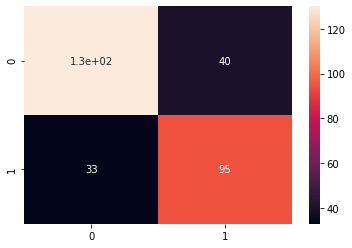

In [16]:
# type your code here
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# type your code here
cm = confusion_matrix(y_test,y_pred)
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
specificity = TN/(TN+FP)
sensitivity = TP/(TP+FN)
correct = (TN+TP)/(TN+TP+FN+FP)
mis = (FN+FP)/(TN+TP+FN+FP)
print('specificity of model ',round(specificity,2))
print('sensitivity of model ',round(sensitivity,2))
print('% of correctly classified of model',round(correct*100,2))
print('% of mis classified of model',round(mis*100,2))

specificity of model  0.76
sensitivity of model  0.74
% of correctly classified of model 75.5
% of mis classified of model 24.5


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the best value of hyperparameters "n_estimators" and "learning_rate" for the adaboost full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

       n_estimators = [100, 120, 150, 200, 250, 300, 350],
       learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015]         

In [18]:
# type your code here
params={'n_estimators':[100, 120, 150, 200, 250, 300, 350],
       'learning_rate':[0.1, 0.01, 0.001, 0.15, 0.015]}  

ad_b=AdaBoostClassifier()
gd=GridSearchCV(ad_b,param_grid=params,scoring='f1_weighted')
model=gd.fit(x_train,y_train)
model.best_params_

{'learning_rate': 0.15, 'n_estimators': 250}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a adaboost model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.Find the bias and variance error.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here
ada = AdaBoostClassifier(learning_rate=0.15,n_estimators=350)
scores = cross_val_score(ada,x_train,y_train,scoring='roc_auc',cv=10)
bias = 1-np.mean(scores)
variance = np.std(scores)/np.mean(scores)
print('The average roc-auc score of model:',round(np.mean(scores),2))
print('BIAS error:',round(bias,2)*100)
print('variance error:',round(variance,2)*100)

The average roc-auc score of model: 0.84
BIAS error: 16.0
variance error: 4.0


<a id="gb"> </a>
## 2. Gradient Boosting

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Build the gradient boosting model 100 estimators and maximum depth 3. Also, find the accuracy score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# type your code here
gb=GradientBoostingClassifier(n_estimators=100,max_depth=3)
model=gb.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('The acuuracy score :',accuracy_score(y_test,y_pred))

The acuuracy score : 0.8791946308724832


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>12. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150, 200, 250, 300, 350],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        max_depth = [2, 3, 4, 5, 6]

In [21]:
# type your code here
params={'n_estimators':[100, 120, 150, 200, 250, 300, 350],
        'learning_rate':[0.1, 0.01, 0.001, 0.15, 0.015], 
        'max_depth':[2, 3, 4, 5, 6]}

gb=GradientBoostingClassifier()
gd_c=GridSearchCV(gb,param_grid=params,scoring='f1_weighted')
model=gd_c.fit(x_train,y_train)
model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 120}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>13. Build the gradient boosting model and an adaboost model with their best parameters and generate a classification report for both of them. Which model is the best and why?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here
GB = GradientBoostingClassifier(learning_rate=0.15,max_depth=6,n_estimators=350)
gb = GB.fit(x_train,y_train)
ypred_gb = gb.predict(x_test)
print('classification_report of GradientBoosting Classifier is')
print(classification_report(y_test,ypred_gb))
ADA = AdaBoostClassifier(learning_rate=0.15,n_estimators=350)
ada = ADA.fit(x_train,y_train)
ypred_ada = ada.predict(x_test)
print('classification_report of AdaBoosting Classifier is')
print(classification_report(y_test,ypred_ada))
#Grdaient estimator is best in terms of performance based on F1 weighted comaprision

classification_report of GradientBoosting Classifier is
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       170
           1       0.93      0.98      0.95       128

    accuracy                           0.96       298
   macro avg       0.95      0.96      0.96       298
weighted avg       0.96      0.96      0.96       298

classification_report of AdaBoosting Classifier is
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       170
           1       0.71      0.77      0.74       128

    accuracy                           0.77       298
   macro avg       0.76      0.77      0.76       298
weighted avg       0.77      0.77      0.77       298



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the area under the receiver operating characteristic curve for tuned gradient boosting model built in question 13. Also plot a confusion matrix. Find the bias and variance error.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# type your code here
score=cross_val_score(GB,x_train,y_train,scoring='roc_auc',cv=5)
bias=1-np.mean(score)
var=np.std(score)/np.mean(score)
print('The Accuracy score :',roc_auc_score(y_test,ypred_gb))
print('BIAS error is  ',round(bias,2)*100)
print('Variance error is  ',round(variance,2)*100)

The Accuracy score : 0.9588694852941176
BIAS error is   1.0
Variance error is   4.0


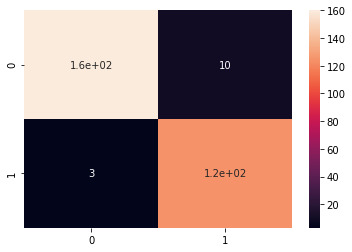

In [25]:
sns.heatmap(confusion_matrix(y_test,ypred_gb),annot=True)
plt.show()

<a id="xgb"> </a>
## 3. Extreme Gradient Boosting (XGBoost)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build the XGBoost model with a learning rate of 0.01 and gamma equal to 2. Calculate the roc_auc score and generate a classification rerport.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# type your code here
xgb = XGBClassifier(learning_rate=0.01,gamma=2)
model = xgb.fit(x_train,y_train)
ypred = model.predict(x_test)
roc_auc = roc_auc_score(y_test,ypred)
print('roc_auc_score is ',round(roc_auc,2))
print('classification_report of model is ')
print(classification_report(y_test,ypred))

[03:23:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
roc_auc_score is  0.84
classification_report of model is 
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       170
           1       0.77      0.88      0.82       128

    accuracy                           0.84       298
   macro avg       0.84      0.84      0.84       298
weighted avg       0.85      0.84      0.84       298



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>16. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the extreme gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        gamma = [2, 3, 4, 5, 6],
        max_depth = [2, 3, 4, 5, 6]

In [28]:
# type your code here
tune=[{'n_estimators':[100, 120, 150],
        'learning_rate':[0.1, 0.01, 0.001, 0.15, 0.015], 
        'gamma':[2, 3, 4, 5, 6],
        'max_depth':[2, 3, 4, 5, 6]}]

xgb = XGBClassifier()
xgb_grid = GridSearchCV(xgb,param_grid=tune,cv=5,scoring='accuracy')
xgb_grid = xgb_grid.fit(x_train,y_train)
xgb_grid.best_params_

[03:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:26:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:26:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:26:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:26:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:26:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:26:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[03:26:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

KeyboardInterrupt: 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>17. Plot the connfusion matrix for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# type your code here
xgb = XGBClassifier(gamma=2,learning_rate=0.15,max_depth=6,n_estimators=100)
model = xgb.fit(x_train,y_train)
ypred = model.predict(x_test)
print(confusion_matrix(y_test,ypred))

[03:27:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[146  24]
 [ 10 118]]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>18. Find the area under the receiver operating characteristic curve for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# type your code here
print('The ROC_AUC_SCORE :',roc_auc_score(y_test,ypred))

The ROC_AUC_SCORE : 0.8903492647058824


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>19. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Adaboost model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
from sklearn.ensemble import StackingClassifier

In [33]:
# type your code here
base_learner= [('Decision tree', DecisionTreeClassifier()),
              ('Random forest', RandomForestClassifier())]

stack= StackingClassifier(estimators=base_learner, final_estimator=AdaBoostClassifier())
stack.fit(x_train, y_train)


ypred= stack.predict(x_test)
print(roc_auc_score(y_test, ypred))

print(classification_report(y_test, ypred))


0.9560202205882352
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       170
           1       0.98      0.93      0.95       128

    accuracy                           0.96       298
   macro avg       0.96      0.96      0.96       298
weighted avg       0.96      0.96      0.96       298



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>20. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Gradient Boosting model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# type your code here
base_learner= [('Decision tree', DecisionTreeClassifier()),
              ('Random forest', RandomForestClassifier())]

stack= StackingClassifier(estimators=base_learner, final_estimator=GradientBoostingClassifier())
stack.fit(x_train, y_train)


ypred= stack.predict(x_test)
print(roc_auc_score(y_test, ypred))

print(classification_report(y_test, ypred))

0.9716452205882352
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       170
           1       0.98      0.96      0.97       128

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298

